## Importing all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

Reading the csv file on my drive

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/movie_success_rate.csv')

columns in the data frame

In [ ]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western', 'Success'],
      dtype='object')

Renaming the columns with space in between to make our work better

In [ ]:
df = df.rename(columns={'Runtime (Minutes)': 'Runtime','Revenue (Millions)':'Revenue'})

In [ ]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime', 'Rating', 'Votes', 'Revenue', 'Metascore', 'Action',
       'Adventure', 'Aniimation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'Success'],
      dtype='object')

An Over view on the data given

In [ ]:
df.describe(include = 'all')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
count,838.000000,838,838,838,838,838,838.00000,838.000000,839.00000,8.390000e+02,...,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000
unique,NaN,837,189,838,524,834,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,485.247017,NaN,NaN,NaN,NaN,NaN,2012.50716,114.638425,6.81432,1.932303e+05,...,0.023866,0.005967,0.102625,0.143198,0.127685,0.017900,0.176611,0.011933,0.004773,0.177804
std,286.572065,NaN,NaN,NaN,NaN,NaN,3.17236,18.470922,0.87723,1.929838e+05,...,0.152724,0.077059,0.303650,0.350484,0.333938,0.132666,0.381567,0.108650,0.068965,0.382576
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.00000,66.000000,1.90000,1.780000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238.250000,NaN,NaN,NaN,NaN,NaN,2010.00000,101.000000,6.30000,6.145500e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,475.500000,NaN,NaN,NaN,NaN,NaN,2013.00000,112.000000,6.90000,1.371170e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,729.750000,NaN,NaN,NaN,NaN,NaN,2015.00000,124.000000,7.50000,2.708650e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Looking at the data_types and the no of null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         838 non-null    float64
 1   Title        838 non-null    object 
 2   Genre        838 non-null    object 
 3   Description  838 non-null    object 
 4   Director     838 non-null    object 
 5   Actors       838 non-null    object 
 6   Year         838 non-null    float64
 7   Runtime      838 non-null    float64
 8   Rating       839 non-null    float64
 9   Votes        839 non-null    float64
 10  Revenue      839 non-null    float64
 11  Metascore    838 non-null    float64
 12  Action       838 non-null    float64
 13  Adventure    838 non-null    float64
 14  Aniimation   838 non-null    float64
 15  Biography    838 non-null    float64
 16  Comedy       838 non-null    float64
 17  Crime        838 non-null    float64
 18  Drama        838 non-null    float64
 19  Family  

some count to be 838 and other to be 834 let's find the actual no of null values in various columns.

In [ ]:
df.isnull().sum()

Rank           1
Title          1
Genre          1
Description    1
Director       1
Actors         1
Year           1
Runtime        1
Rating         0
Votes          0
Revenue        0
Metascore      1
Action         1
Adventure      1
Aniimation     1
Biography      1
Comedy         1
Crime          1
Drama          1
Family         1
Fantasy        1
History        1
Horror         1
Music          1
Musical        1
Mystery        1
Romance        1
Sci-Fi         1
Sport          1
Thriller       1
War            1
Western        1
Success        1
dtype: int64

Let's look at the a null value

In [ ]:
df[df.Rank.isnull()]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.81432,193230.2518,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For this record all of them seems to be null except some columns so let's drop this record from the dataframe

In [ ]:
df = df.drop(index = 838,axis = 0)

Let's recheck once again for the null values

In [ ]:
df.isnull().sum()

Rank           0
Title          0
Genre          0
Description    0
Director       0
Actors         0
Year           0
Runtime        0
Rating         0
Votes          0
Revenue        0
Metascore      0
Action         0
Adventure      0
Aniimation     0
Biography      0
Comedy         0
Crime          0
Drama          0
Family         0
Fantasy        0
History        0
Horror         0
Music          0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Sport          0
Thriller       0
War            0
Western        0
Success        0
dtype: int64

In [ ]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime', 'Rating', 'Votes', 'Revenue', 'Metascore', 'Action',
       'Adventure', 'Aniimation', 'Biography', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'Success'],
      dtype='object')

Droping the extra columns which do not contribute for the pridiction of the movie

In [ ]:
df_training = df.drop(columns = ['Rank','Title','Genre','Description','Director','Actors'])
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        838 non-null    float64
 1   Runtime     838 non-null    float64
 2   Rating      838 non-null    float64
 3   Votes       838 non-null    float64
 4   Revenue     838 non-null    float64
 5   Metascore   838 non-null    float64
 6   Action      838 non-null    float64
 7   Adventure   838 non-null    float64
 8   Aniimation  838 non-null    float64
 9   Biography   838 non-null    float64
 10  Comedy      838 non-null    float64
 11  Crime       838 non-null    float64
 12  Drama       838 non-null    float64
 13  Family      838 non-null    float64
 14  Fantasy     838 non-null    float64
 15  History     838 non-null    float64
 16  Horror      838 non-null    float64
 17  Music       838 non-null    float64
 18  Musical     838 non-null    float64
 19  Mystery     838 non-null    f

splitting the columns to be predicted

In [ ]:
x = df_training.drop('Success',axis = 1)
y = df_training.Success

Training the data using different algorithums using **Grid_Search**

Training and evaluating KNN
F1 Score: 0.7307692307692307
Confusion Matrix:
 [[135   5]
 [  9  19]]

 KNeighborsClassifier()

Training and evaluating Random Forest
F1 Score: 0.962962962962963
Confusion Matrix:
 [[140   0]
 [  2  26]]

 RandomForestClassifier(max_depth=7)

Training and evaluating Logistic Regression
F1 Score: 0.7924528301886793
Confusion Matrix:
 [[136   4]
 [  7  21]]

 LogisticRegression(C=0.1)

Training and evaluating Decision Tree
F1 Score: 0.962962962962963
Confusion Matrix:
 [[140   0]
 [  2  26]]

 DecisionTreeClassifier(max_depth=3)

Training and evaluating XGBoost
F1 Score: 0.962962962962963
Confusion Matrix:
 [[140   0]
 [  2  26]]

 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_

<Axes: >

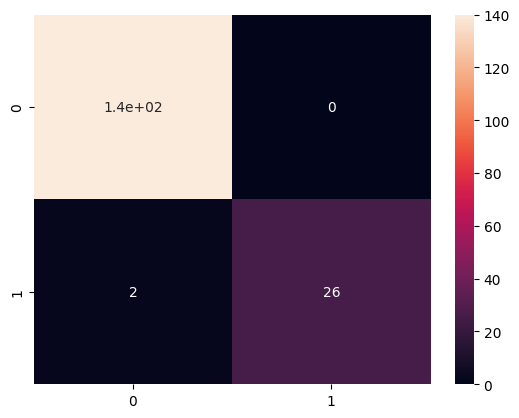

In [ ]:
def train_and_evaluate_model(model, param_grid, features, result):
    # Separate the features and target variables
    X = features
    y = result

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)


    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)

    # Train the model with the best parameters
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)

    # Make predictions on the test dataset
    y_pred = best_model.predict(X_test)

    # Calculate the F1 score
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Print the F1 score
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", cm)

    # Return the best model and its F1 score
    print("\n",best_model)
    return best_model, f1 ,cm


# Create instances of the models
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

# Define the parameter grid for tuning for each model
param_grids = {
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Random Forest': {'n_estimators': [100], 'max_depth': [5, 7, 10], 'min_samples_split': [2, 5, 10]},
    'Logistic Regression': {'C': [0.1, 1.0]},
    'Decision Tree': {'max_depth': [3, 5, 10,20], 'min_samples_split': [2, 5, 10]},
    'XGBoost': {'n_estimators': [80,100], 'max_depth': [4,3,5], 'random_state': [2,4,5,7]}

}

# Variables to store the best score and model
best_score = 0
best_model = None

# Iterate over the models and call the function to train, tune, and evaluate each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}")
    param_grid = param_grids[model_name]
    trained_model, f1, cm = train_and_evaluate_model(model, param_grid, x, y)
    if f1 > best_score:
        best_score = f1
        best_model = trained_model
    print()  # Print a newline for better readability

# Print the best model and its best score
print("Best Model:", best_model)
sns.heatmap(cm,annot = True)


Checking the Model

In [ ]:
ex = x.iloc[666,:]
ex = ex.to_frame().T

In [ ]:
prediction = best_model.predict(ex)

In [ ]:
print("prediction: ",prediction)
print("original: " , y.loc[666])

prediction:  [0.]
original:  0.0


Checking on for various scalling techniques so as to improve the model

In [ ]:
# Function to draw KDE plots for each column using the given scaler
def draw_kde_plots(dataframe, scaler):
    # Scale the DataFrame using the given scaler
    scaled_data = scaler.fit_transform(dataframe)
    scaled_dataframe = pd.DataFrame(scaled_data, columns=dataframe.columns)

    # Plot KDE plots for each column
    for col in scaled_dataframe.columns:
        sns.kdeplot(scaled_dataframe[col], label=col)

    plt.title(f"KDE Plot ({scaler.__class__.__name__})")
    plt.legend()
    plt.show()

# Scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Draw KDE plots for each column using different scalers
draw_kde_plots(x, minmax_scaler)
draw_kde_plots(x, standard_scaler)


Try with the **MinMaxScaler** First

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns = x.columns)
x_scaled

,Year,Runtime,Rating,Votes,Revenue,Metascore,Action,Adventure,Aniimation,Biography,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0.8,0.454545,0.873239,0.422437,0.355669,0.730337,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.6,0.479339,0.718310,0.271045,0.135016,0.606742,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.421488,0.760563,0.087863,0.147465,0.573034,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.347107,0.746479,0.033692,0.288609,0.539326,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.471074,0.605634,0.219647,0.347010,0.325843,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,0.4,0.256198,0.563380,0.078539,0.064198,0.292135,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
834,0.6,0.181818,0.676056,0.091481,0.058422,0.415730,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835,0.1,0.231405,0.507042,0.040728,0.018727,0.393258,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836,0.2,0.264463,0.605634,0.039359,0.061935,0.438202,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Training on the scaled data

Training and evaluating KNN
F1 Score: 0.509090909090909
Confusion Matrix:
 [[127  13]
 [ 14  14]]

 KNeighborsClassifier(n_neighbors=3)

Training and evaluating Random Forest
F1 Score: 0.962962962962963
Confusion Matrix:
 [[140   0]
 [  2  26]]

 RandomForestClassifier(max_depth=10, min_samples_split=5)

Training and evaluating Logistic Regression
F1 Score: 0.75
Confusion Matrix:
 [[138   2]
 [ 10  18]]

 LogisticRegression()

Training and evaluating Decision Tree
F1 Score: 0.962962962962963
Confusion Matrix:
 [[140   0]
 [  2  26]]

 DecisionTreeClassifier(max_depth=3)

Training and evaluating XGBoost
F1 Score: 0.962962962962963
Confusion Matrix:
 [[140   0]
 [  2  26]]

 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=No

<Axes: >

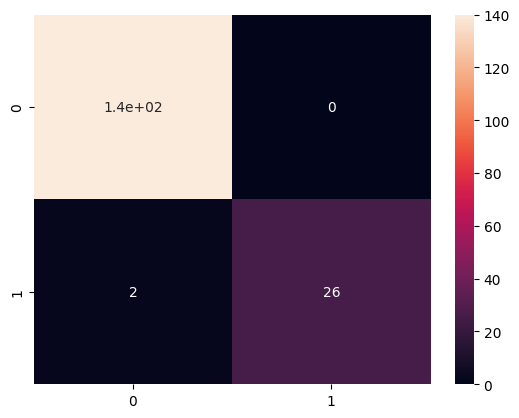

In [ ]:
def train_and_evaluate_model(model, param_grid, features, result):
    # Separate the features and target variables
    X = features
    y = result

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)


    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)

    # Train the model with the best parameters
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)

    # Make predictions on the test dataset
    y_pred = best_model.predict(X_test)

    # Calculate the F1 score
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Print the F1 score
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", cm)

    # Return the best model and its F1 score
    print("\n",best_model)
    return best_model, f1 ,cm


# Create instances of the models
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

# Define the parameter grid for tuning for each model
param_grids = {
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Random Forest': {'n_estimators': [100], 'max_depth': [5, 7, 10], 'min_samples_split': [2, 5, 10]},
    'Logistic Regression': {'C': [0.1, 1.0]},
    'Decision Tree': {'max_depth': [3, 5, 10,20], 'min_samples_split': [2, 5, 10]},
    'XGBoost': {'n_estimators': [80,100], 'max_depth': [4,3,5], 'random_state': [2,4,5,7]}

}

# Variables to store the best score and model
best_score = 0
best_model = None

# Iterate over the models and call the function to train, tune, and evaluate each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}")
    param_grid = param_grids[model_name]
    trained_model, f1, cm = train_and_evaluate_model(model, param_grid, x_scaled, y)
    if f1 > best_score:
        best_score = f1
        best_model = trained_model
    print()  # Print a newline for better readability

# Print the best model and its best score
print("Best Model:", best_model)
sns.heatmap(cm,annot = True)


The f1 score remains the same lets try with **Standard Scaler**

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns = x.columns)
x_scaled

,Year,Runtime,Rating,Votes,Revenue,Metascore,Action,Adventure,Aniimation,Biography,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0.470858,0.344616,1.465614,2.921716,2.379577,0.969456,1.423120,1.560265,-0.238215,-0.294788,...,-0.340361,-0.156365,-0.077475,-0.338174,-0.408816,2.613767,-0.135004,-0.463134,-0.109897,-0.069254
1,-0.159964,0.507130,0.211666,1.516137,0.401075,0.320194,-0.702681,1.560265,-0.238215,-0.294788,...,-0.340361,-0.156365,-0.077475,2.957057,-0.408816,2.613767,-0.135004,-0.463134,-0.109897,-0.069254
2,1.101680,0.127930,0.553652,-0.184597,0.512699,0.143122,-0.702681,-0.640917,-0.238215,-0.294788,...,2.938058,-0.156365,-0.077475,-0.338174,-0.408816,-0.382590,-0.135004,2.159204,-0.109897,-0.069254
3,1.101680,-0.359613,0.439657,-0.687546,1.778281,-0.033949,-0.702681,-0.640917,4.197883,-0.294788,...,-0.340361,-0.156365,-0.077475,-0.338174,-0.408816,-0.382590,-0.135004,-0.463134,-0.109897,-0.069254
4,1.101680,0.452959,-0.700295,1.038931,2.301938,-1.155403,1.423120,1.560265,-0.238215,-0.294788,...,-0.340361,-0.156365,-0.077475,-0.338174,-0.408816,-0.382590,-0.135004,-0.463134,-0.109897,-0.069254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,-0.790786,-0.955500,-1.042281,-0.271164,-0.233918,-1.332474,1.423120,1.560265,-0.238215,-0.294788,...,2.938058,-0.156365,-0.077475,-0.338174,-0.408816,-0.382590,-0.135004,-0.463134,-0.109897,-0.069254
834,-0.159964,-1.443043,-0.130319,-0.151009,-0.285709,-0.683212,-0.702681,-0.640917,-0.238215,-0.294788,...,-0.340361,-0.156365,-0.077475,-0.338174,-0.408816,-0.382590,-0.135004,-0.463134,-0.109897,-0.069254
835,-1.737019,-1.118014,-1.498261,-0.622219,-0.641642,-0.801260,-0.702681,-0.640917,-0.238215,-0.294788,...,2.938058,-0.156365,-0.077475,-0.338174,-0.408816,-0.382590,-0.135004,-0.463134,-0.109897,-0.069254
836,-1.421608,-0.901328,-0.700295,-0.634930,-0.254213,-0.565164,-0.702681,-0.640917,-0.238215,-0.294788,...,-0.340361,6.395311,-0.077475,-0.338174,2.446085,-0.382590,-0.135004,-0.463134,-0.109897,-0.069254


Training and evaluating KNN
F1 Score: 0.6923076923076924
Confusion Matrix:
 [[134   6]
 [ 10  18]]

 KNeighborsClassifier(n_neighbors=3)

Training and evaluating Random Forest
F1 Score: 0.962962962962963
Confusion Matrix:
 [[140   0]
 [  2  26]]

 RandomForestClassifier(max_depth=7)

Training and evaluating Logistic Regression
F1 Score: 0.8148148148148148
Confusion Matrix:
 [[136   4]
 [  6  22]]

 LogisticRegression()

Training and evaluating Decision Tree
F1 Score: 0.962962962962963
Confusion Matrix:
 [[140   0]
 [  2  26]]

 DecisionTreeClassifier(max_depth=3)

Training and evaluating XGBoost
F1 Score: 0.962962962962963
Confusion Matrix:
 [[140   0]
 [  2  26]]

 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, imp

<Axes: >

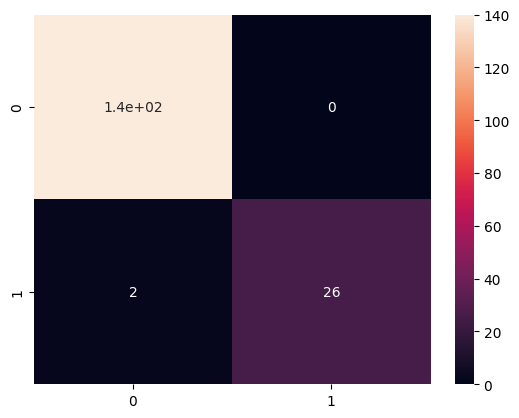

In [ ]:
def train_and_evaluate_model(model, param_grid, features, result):
    # Separate the features and target variables
    X = features
    y = result

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)


    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)

    # Train the model with the best parameters
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)

    # Make predictions on the test dataset
    y_pred = best_model.predict(X_test)

    # Calculate the F1 score
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Print the F1 score
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", cm)

    # Return the best model and its F1 score
    print("\n",best_model)
    return best_model, f1 ,cm


# Create instances of the models
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

# Define the parameter grid for tuning for each model
param_grids = {
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Random Forest': {'n_estimators': [100], 'max_depth': [5, 7, 10], 'min_samples_split': [2, 5, 10]},
    'Logistic Regression': {'C': [0.1, 1.0]},
    'Decision Tree': {'max_depth': [3, 5, 10,20], 'min_samples_split': [2, 5, 10]},
    'XGBoost': {'n_estimators': [80,100], 'max_depth': [4,3,5], 'random_state': [2,4,5,7]}

}

# Variables to store the best score and model
best_score = 0
best_model = None

# Iterate over the models and call the function to train, tune, and evaluate each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}")
    param_grid = param_grids[model_name]
    trained_model, f1, cm = train_and_evaluate_model(model, param_grid, x_scaled, y)
    if f1 > best_score:
        best_score = f1
        best_model = trained_model
    print()  # Print a newline for better readability

# Print the best model and its best score
print("Best Model:", best_model)
sns.heatmap(cm,annot = True)


In any of the Transformation the f1 score of the various models are the same
So the best model for this would be **Random Forest**